# Relative Volume (RVOL) Indicator

**Formula**: Current Volume / Average Volume

**Interpretation:**
- RVOL > 1: Above-average volume
- RVOL = 1: Normal volume
- RVOL < 1: Below-average volume

**Key signals**: RVOL > 2-3 indicates breakout potential

In [1]:
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from indikator import rvol

plt.style.use('seaborn-v0_8-darkgrid')
np.random.seed(42)

## Scenario 1: Breakout Volume Detection

/tmp/sselcuk/ipykernel_1244518/2780267401.py:71: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


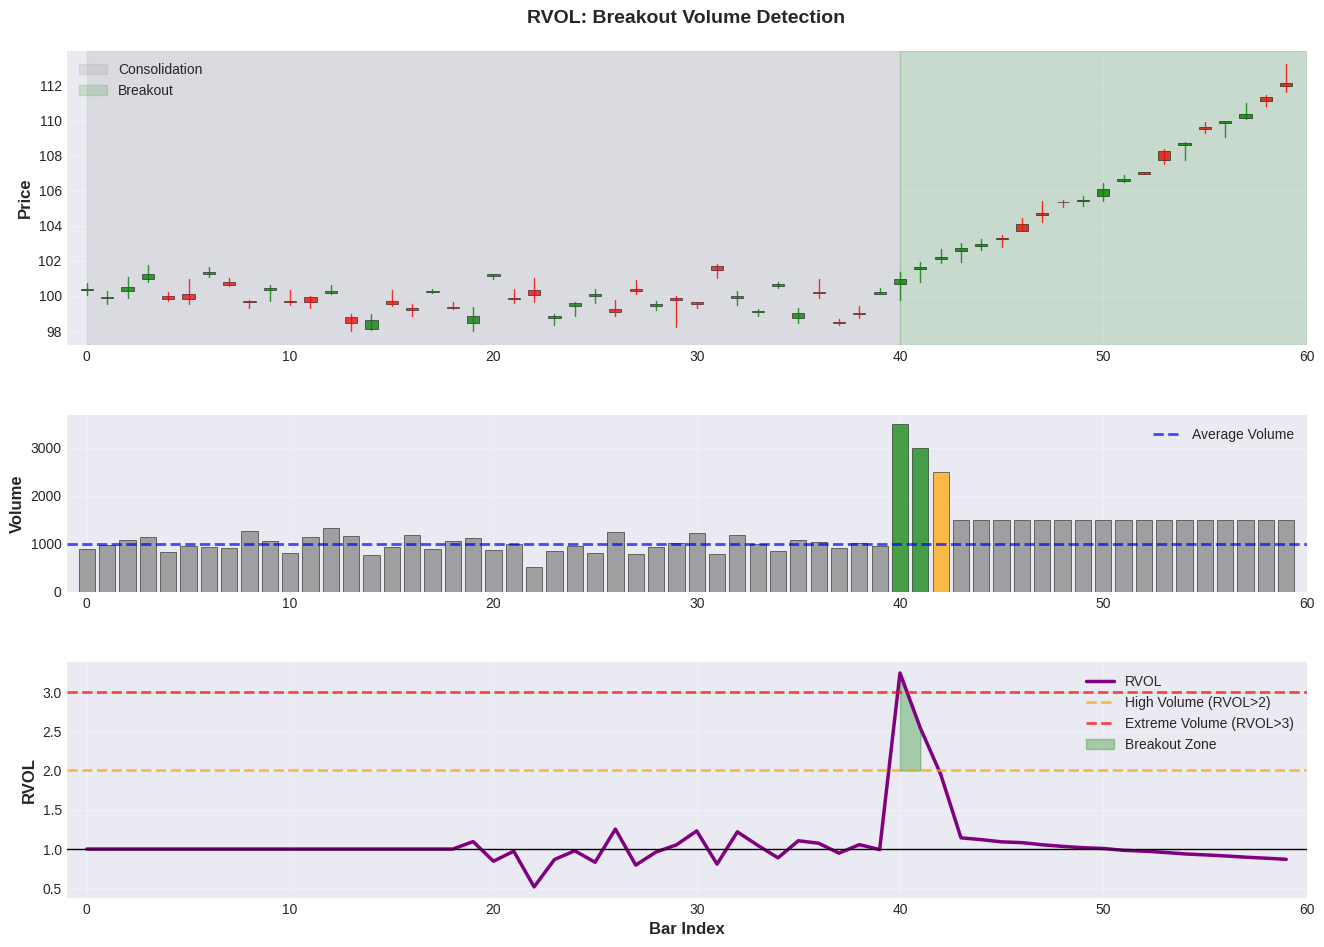

Maximum RVOL: 3.24x at bar 40
Volume at breakout: 3500

3.2x normal volume confirms breakout!


In [2]:
# Consolidation then breakout
n = 60
dates = pd.date_range('2024-01-01 09:30', periods=n, freq='5min')

# Consolidation then breakout
consolidation = 100 + np.random.randn(40) * 0.8
breakout = consolidation[-1] + np.cumsum(np.ones(20) * 0.6 + np.random.randn(20) * 0.3)
closes = np.concatenate([consolidation, breakout])

# Create OHLC
opens = closes + np.random.randn(n) * 0.2
highs = np.maximum(opens, closes) + np.abs(np.random.randn(n)) * 0.4
lows = np.minimum(opens, closes) - np.abs(np.random.randn(n)) * 0.4

# Volume: normal during consolidation, spike during breakout
volumes = np.concatenate([
    1000 + np.random.randn(40) * 150,  # Normal
    np.array([3500, 3000, 2500] + [1500] * 17)  # Breakout volume
])
volumes = np.abs(volumes)

df = pd.DataFrame({'open': opens, 'high': highs, 'low': lows, 'close': closes, 'volume': volumes}, index=dates)
result = rvol(df["volume"], window=20)

# Plot
fig = plt.figure(figsize=(16, 11))
gs = GridSpec(3, 1, height_ratios=[2.5, 1.5, 2], hspace=0.3)
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1], sharex=ax1)
ax3 = fig.add_subplot(gs[2], sharex=ax1)

# Candlesticks
for i in range(len(df)):
    color = 'green' if df['close'].iloc[i] >= df['open'].iloc[i] else 'red'
    ax1.plot([i, i], [df['low'].iloc[i], df['high'].iloc[i]], color=color, linewidth=1, alpha=0.8)
    height = abs(df['close'].iloc[i] - df['open'].iloc[i])
    if height < 0.05: height = 0.1
    bottom = min(df['open'].iloc[i], df['close'].iloc[i])
    ax1.add_patch(plt.Rectangle((i-0.3, bottom), 0.6, height, facecolor=color, edgecolor='black', linewidth=0.5, alpha=0.8))

ax1.axvspan(0, 40, alpha=0.15, color='gray', label='Consolidation')
ax1.axvspan(40, 60, alpha=0.15, color='green', label='Breakout')
ax1.set_ylabel('Price', fontsize=12, fontweight='bold')
ax1.set_title('RVOL: Breakout Volume Detection', fontsize=14, fontweight='bold', pad=20)
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.set_xlim(-1, len(df))

# Volume
rvol_vals = result.values
colors = ['green' if r > 2 else 'orange' if r > 1.5 else 'gray' for r in rvol_vals]
ax2.bar(range(len(df)), volumes, color=colors, alpha=0.7, edgecolor='black', linewidth=0.5)
ax2.axhline(1000, color='blue', linestyle='--', linewidth=2, label='Average Volume', alpha=0.7)
ax2.set_ylabel('Volume', fontsize=12, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.set_xlim(-1, len(df))

# RVOL
ax3.plot(range(len(rvol_vals)), rvol_vals, 'purple', linewidth=2.5, label='RVOL')
ax3.axhline(1, color='black', linestyle='-', linewidth=1)
ax3.axhline(2, color='orange', linestyle='--', linewidth=2, label='High Volume (RVOL>2)', alpha=0.7)
ax3.axhline(3, color='red', linestyle='--', linewidth=2, label='Extreme Volume (RVOL>3)', alpha=0.7)
ax3.fill_between(range(len(df)), 2, rvol_vals, where=(rvol_vals > 2), alpha=0.3, color='green', label='Breakout Zone')
ax3.set_xlabel('Bar Index', fontsize=12, fontweight='bold')
ax3.set_ylabel('RVOL', fontsize=12, fontweight='bold')
ax3.legend(loc='upper right')
ax3.grid(True, alpha=0.3)
ax3.set_xlim(-1, len(df))

plt.tight_layout()
plt.show()

max_rvol = result.max()
max_idx = result.idxmax()
idx_int = list(df.index).index(max_idx)
print(f"Maximum RVOL: {max_rvol:.2f}x at bar {idx_int}")
print(f"Volume at breakout: {volumes[idx_int]:.0f}")
print(f"\n{max_rvol:.1f}x normal volume confirms breakout!")

## Scenario 2: Low Volume Warning
Avoid trading during low RVOL periods

/tmp/sselcuk/ipykernel_1244518/681045484.py:47: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


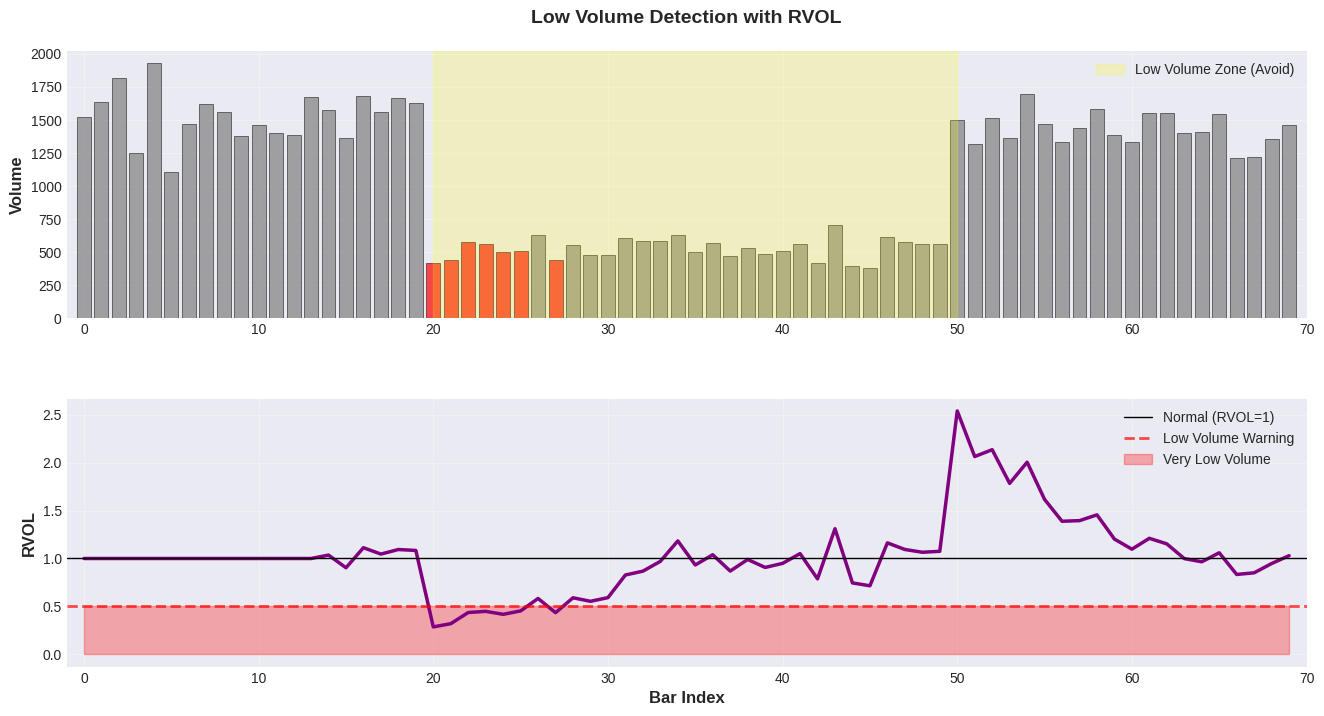

Bars with RVOL < 0.5: 7 (10.0%)

Low RVOL = Low liquidity = Avoid trading!


In [3]:
# Low volume consolidation
n2 = 70
dates2 = pd.date_range('2024-01-01 10:00', periods=n2, freq='5min')

volumes2 = np.concatenate([
    1500 + np.random.randn(20) * 200,  # Normal
    500 + np.random.randn(30) * 100,   # Low volume
    1500 + np.random.randn(20) * 200   # Return to normal
])
volumes2 = np.abs(volumes2)

closes2 = 100 + np.cumsum(np.random.randn(n2) * 0.4)
opens2 = closes2 + np.random.randn(n2) * 0.2
highs2 = np.maximum(opens2, closes2) + np.abs(np.random.randn(n2)) * 0.3
lows2 = np.minimum(opens2, closes2) - np.abs(np.random.randn(n2)) * 0.3

df2 = pd.DataFrame({'open': opens2, 'high': highs2, 'low': lows2, 'close': closes2, 'volume': volumes2}, index=dates2)
result2 = rvol(df2["volume"], window=15)

fig = plt.figure(figsize=(16, 8))
gs = GridSpec(2, 1, height_ratios=[1.5, 1.5], hspace=0.3)
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1], sharex=ax1)

# Volume
rvol_vals2 = result2.values
colors2 = ['red' if r < 0.5 else 'gray' for r in rvol_vals2]
ax1.bar(range(len(df2)), volumes2, color=colors2, alpha=0.7, edgecolor='black', linewidth=0.5)
ax1.axvspan(20, 50, alpha=0.2, color='yellow', label='Low Volume Zone (Avoid)')
ax1.set_ylabel('Volume', fontsize=12, fontweight='bold')
ax1.set_title('Low Volume Detection with RVOL', fontsize=14, fontweight='bold', pad=20)
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.set_xlim(-1, len(df2))

# RVOL
ax2.plot(range(len(rvol_vals2)), rvol_vals2, 'purple', linewidth=2.5)
ax2.axhline(1, color='black', linestyle='-', linewidth=1, label='Normal (RVOL=1)')
ax2.axhline(0.5, color='red', linestyle='--', linewidth=2, label='Low Volume Warning', alpha=0.7)
ax2.fill_between(range(len(df2)), 0, 0.5, alpha=0.3, color='red', label='Very Low Volume')
ax2.set_xlabel('Bar Index', fontsize=12, fontweight='bold')
ax2.set_ylabel('RVOL', fontsize=12, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.set_xlim(-1, len(df2))

plt.tight_layout()
plt.show()

low_vol_bars = (result2 < 0.5).sum()
print(f"Bars with RVOL < 0.5: {low_vol_bars} ({low_vol_bars/len(df2)*100:.1f}%)")
print("\nLow RVOL = Low liquidity = Avoid trading!")

## Key Takeaways

**RVOL Thresholds:**
- **RVOL > 3**: Exceptional volume (major news, breakout)
- **RVOL 2-3**: High volume (significant interest)
- **RVOL 1-2**: Above average (increased activity)
- **RVOL 0.5-1**: Normal to below average
- **RVOL < 0.5**: Very low (avoid trading)

**Window Selection:**
- **Small (5-10)**: More sensitive, good for intraday
- **Medium (15-20)**: Balanced, general purpose
- **Large (30+)**: Smooth, better anomaly detection

**Trading Applications:**
1. **Breakout confirmation**: High RVOL validates price breakouts
2. **Avoid low liquidity**: RVOL < 0.5 warns of poor conditions
3. **Climax detection**: Extreme RVOL may signal exhaustion
4. **Filter**: Only trade when RVOL > 1.0 (above average interest)

**Best Practices:**
- Combine with price action (don't trade volume alone)
- Compare to historical RVOL patterns
- Adjust thresholds per asset (crypto vs stocks differ)
- Use larger windows to detect true anomalies

## Feature Showcase: Safety & Configuration

In [4]:
# Configuration & Validation Showcase
# ---------------------------------------------------------
import pandas as pd
import numpy as np
from indikator import rvol

# 1. Configuration with .Config()
print(f"--- Custom rvol Configuration ---")
# Create a fully configured version of the indicator
# This factory pattern validates parameters at creation time
custom_rvol = rvol.Config(window=30).make()
print(f"Created: {custom_rvol}")

# 2. Validation Safety
print(f"--- Input Validation Safety ---")
try:
    # Attempt to use invalid data (missing columns)
    invalid_data = pd.DataFrame({'close': [100]}) # Missing volume
    print("Attempting calculation with invalid inputs...")
    rvol(invalid_data)
except Exception as e:
    # The @validated decorator automatically catches the issue
    print(f"✓ Validator caught error as expected: {e}")


--- Custom rvol Configuration ---
Created: rvol(window=30, epsilon=1e-09)
--- Input Validation Safety ---
Attempting calculation with invalid inputs...
✓ Validator caught error as expected: Type mismatch for parameter 'data' in 'rvol': expected Series, got DataFrame
